In [1]:
import pandas as pd

In [3]:
chris_data = pd.read_csv('021721_cedars_programs_final_saved_20210315.csv')
cpuc = pd.read_csv('cpuc_claims_selected_programs_2017_2019.csv')
cedars = pd.read_csv('claims_selected_programs_2016_2020.csv', 
                     usecols = ['Claim ID', 'Program ID', 'Budget', 'First Year Gross kWh', 'First Year Gross Therm'])

In [4]:
cpuc_and_budget = cpuc.merge(cedars, left_on='ClaimID', right_on='Claim ID', how='left')

In [6]:
cpuc_b_g = cpuc_and_budget.merge(chris_data, left_on='PrgID', right_on='PrgID', how='left')

In [7]:
cpuc_b_g.columns

Index(['ClaimID', 'PrgID', 'Sector_x', 'SiteCity', 'SiteZipCode', 'SiteID',
       'NAICSCode', 'BldgHVAC', 'BldgLoc', 'BldgType', 'BldgVint',
       'E3ClimateZone', 'E3GasSavProfile', 'E3GasSector',
       'E3MeaElecEndUseShape', 'E3TargetSector', 'ImplementationID',
       'InstallationDate', 'NAICSBldgType', 'NumUnits', 'OBF_Flag',
       'PrgElement', 'RateScheduleElec', 'RateScheduleGas', 'REN_Flag',
       'Residential_Flag', 'SchoolIdentifier', 'TotalFirstYearGrosskW',
       'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm',
       'TotalGrossIncentive', 'TotalGrossMeasureCost',
       'TotalGrossMeasureCost_ER', 'TotalLifecycleGrosskW',
       'TotalLifecycleGrosskWh', 'TotalLifecycleGrossTherm', 'Upstream_Flag_x',
       'WaterOnly_Flag', 'PrgYear', 'Claim ID', 'Program ID',
       'First Year Gross kWh', 'First Year Gross Therm', 'Budget', 'PA',
       'ProgramName', 'Grouping', 'County', 'Selected', 'PrimarySector',
       'Sector_y', 'BP Sector', 'ProgramImplementer', 

In [8]:
selected = cpuc_b_g[cpuc_b_g['Selected']=='x']

In [9]:
selected.shape

(746373, 72)

In [10]:
selected.to_csv('selected_programs_merged_with_budget.csv')

In [16]:
selected[selected['PrgID']=='SCE-13-L-002Y']['Grouping']

508741    Local Government ()
508742    Local Government ()
508743    Local Government ()
509376    Local Government ()
509381    Local Government ()
                 ...         
588635    Local Government ()
588636    Local Government ()
588637    Local Government ()
588638    Local Government ()
588639    Local Government ()
Name: Grouping, Length: 1489, dtype: object

## Total Tax Revenue per city column

In [18]:
taxes = pd.read_csv('Total Taxes_Total Revenues.csv')

In [19]:
taxes.head()

,Entity Name,2016-2017,2017-2018,Entity Name.1,2018-2019,Unnamed: 5,total tax revenue 2016-2019
0,Adelanto,6407577.0,8379208,Adelanto,8842082.0,NaN,23628867.0
1,Agoura Hills,19346497.0,20776976,Agoura Hills,18491359.0,NaN,58614832.0
2,Alameda,82392105.0,104149055,Alameda,95816394.0,NaN,282357554.0
3,Albany,18946529.0,19815521,Albany,18580640.0,NaN,57342690.0
4,Alhambra,48888081.0,54145658,Alhambra,51948185.0,NaN,154981924.0


In [20]:
df = taxes.copy()

In [21]:
df['Entity Name'].rename('City', inplace=True)

0          Adelanto
1      Agoura Hills
2           Alameda
3            Albany
4          Alhambra
           ...     
959             NaN
960             NaN
961             NaN
962             NaN
963             NaN
Name: City, Length: 964, dtype: object

In [23]:
df.iloc[484, :]

Entity Name                         NaN
2016-2017                           NaN
2017-2018                      95816394
Entity Name.1                   Alameda
2018-2019                           NaN
Unnamed: 5                          NaN
total tax revenue 2016-2019         NaN
Name: 484, dtype: object

In [26]:
df.drop(index=[484,963])

,Entity Name,2016-2017,2017-2018,Entity Name.1,2018-2019,Unnamed: 5,total tax revenue 2016-2019
0,Adelanto,6407577.0,8379208,Adelanto,8842082.0,NaN,23628867.0
1,Agoura Hills,19346497.0,20776976,Agoura Hills,18491359.0,NaN,58614832.0
2,Alameda,82392105.0,104149055,Alameda,95816394.0,NaN,282357554.0
3,Albany,18946529.0,19815521,Albany,18580640.0,NaN,57342690.0
4,Alhambra,48888081.0,54145658,Alhambra,51948185.0,NaN,154981924.0
...,...,...,...,...,...,...,...
958,NaN,NaN,35609065,Yorba Linda,NaN,NaN,NaN
959,NaN,NaN,9950055,Yountville,NaN,NaN,NaN
960,NaN,NaN,6339593,Yreka,NaN,NaN,NaN
961,NaN,NaN,31195141,Yuba City,NaN,NaN,NaN


In [34]:
numbers=[]
for i in range(484, 964):
    numbers.append(i)

In [35]:
numbers[-1]

963

In [36]:
df.drop(index=numbers, inplace=True)

df.drop(index=[482,483], inplace=True)

In [41]:
df.drop(columns=['Entity Name.1', 'Unnamed: 5'], inplace=True)

In [42]:
df.head()

,Entity Name,2016-2017,2017-2018,2018-2019,total tax revenue 2016-2019
0,Adelanto,6407577.0,8379208,8842082.0,23628867.0
1,Agoura Hills,19346497.0,20776976,18491359.0,58614832.0
2,Alameda,82392105.0,104149055,95816394.0,282357554.0
3,Albany,18946529.0,19815521,18580640.0,57342690.0
4,Alhambra,48888081.0,54145658,51948185.0,154981924.0


In [47]:
df.rename(columns={'Entity Name':'City'}, inplace=True)

In [48]:
df

,City,2016-2017,2017-2018,2018-2019,total tax revenue 2016-2019
0,Adelanto,6407577.0,8379208,8842082.0,23628867.0
1,Agoura Hills,19346497.0,20776976,18491359.0,58614832.0
2,Alameda,82392105.0,104149055,95816394.0,282357554.0
3,Albany,18946529.0,19815521,18580640.0,57342690.0
4,Alhambra,48888081.0,54145658,51948185.0,154981924.0
...,...,...,...,...,...
477,Yountville,10555864.0,11706852,9950055.0,32212771.0
478,Yreka,5368860.0,6591958,6339593.0,18300411.0
479,Yuba City,30307319.0,33789592,31195141.0,95292052.0
480,Yucaipa,17882849.0,20493724,18863739.0,57240312.0


### Average Tax Revenue

In [51]:
average = df.drop(columns='total tax revenue 2016-2019').mean(axis=1)

In [53]:
len(average)

482

In [57]:
df = df.join(average.rename('Average Tax Revenue'))

In [63]:
df.rename(columns={'total tax revenue 2016-2019': 'Total Tax Revenue'}, inplace=True)

In [64]:
df.to_csv('city_tax_revenue_2016_2019.csv')

# Distribution attempts

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\audre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\audre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


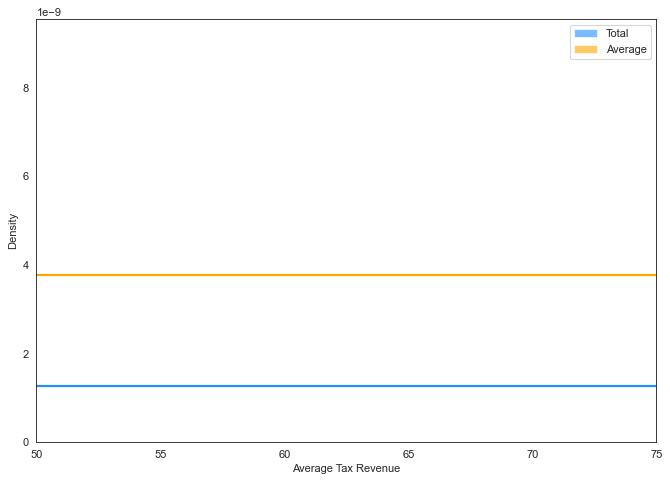

In [67]:
sns.set_style("white")

# Import data
x1 = df['Total Tax Revenue']
x2 = df['Average Tax Revenue']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Total", **kwargs)
sns.distplot(x2, color="orange", label="Average", **kwargs)

plt.xlim(50,75)
plt.legend();

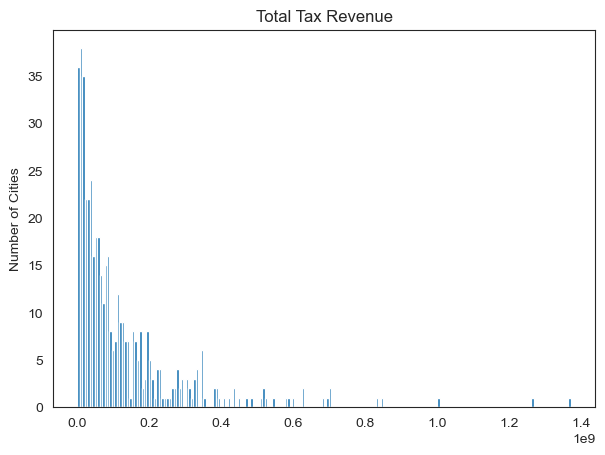

In [83]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df.drop(index=big_cities)['Total Tax Revenue']
plt.hist(x, bins=200)
plt.gca().set(title='Total Tax Revenue', ylabel='Number of Cities');

In [82]:
big_cities = df[df['Total Tax Revenue']>=2000000000].index.to_list()

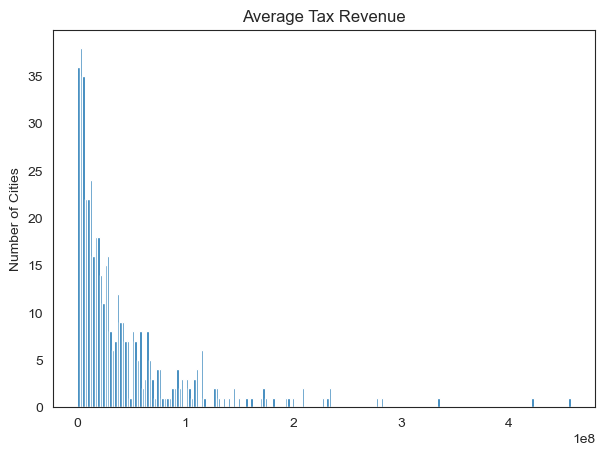

In [85]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = df.drop(index=big_cities)['Average Tax Revenue']
plt.hist(x, bins=200)
plt.gca().set(title='Average Tax Revenue', ylabel='Number of Cities');

In [86]:
df

,City,2016-2017,2017-2018,2018-2019,Total Tax Revenue,Average Tax Revenue
0,Adelanto,6407577.0,8379208,8842082.0,23628867.0,7.876289e+06
1,Agoura Hills,19346497.0,20776976,18491359.0,58614832.0,1.953828e+07
2,Alameda,82392105.0,104149055,95816394.0,282357554.0,9.411918e+07
3,Albany,18946529.0,19815521,18580640.0,57342690.0,1.911423e+07
4,Alhambra,48888081.0,54145658,51948185.0,154981924.0,5.166064e+07
...,...,...,...,...,...,...
477,Yountville,10555864.0,11706852,9950055.0,32212771.0,1.073759e+07
478,Yreka,5368860.0,6591958,6339593.0,18300411.0,6.100137e+06
479,Yuba City,30307319.0,33789592,31195141.0,95292052.0,3.176402e+07
480,Yucaipa,17882849.0,20493724,18863739.0,57240312.0,1.908010e+07


# Population column

In [91]:
citypop = pd.read_csv('california_city_pop.csv')

In [92]:
citypop.head()

,City,Population,Unnamed: 2,Unnamed: 3
0,"Adelanto city, California","34,049",NaN,NaN
1,"Agoura Hills city, California","20,222",NaN,NaN
2,"Alameda city, California","77,624",NaN,NaN
3,"Albany city, California","19,696",NaN,NaN
4,"Alhambra city, California","83,750",NaN,NaN


In [93]:
citypop.drop(columns=['Unnamed: 2', 'Unnamed: 3'], inplace=True)

In [94]:
citypop.head()

,City,Population
0,"Adelanto city, California","34,049"
1,"Agoura Hills city, California","20,222"
2,"Alameda city, California","77,624"
3,"Albany city, California","19,696"
4,"Alhambra city, California","83,750"


In [95]:
pop = citypop.copy()

In [97]:
pop['City'] = pop['City'].str.replace(' city, California','')

pop['City'] = pop['City'].str.replace(' town, California', '')

In [109]:
pop.tail(10)

,City,Population
477,Yountville,"2,966"
478,Yreka,"7,518"
479,Yuba City,"67,010"
480,Yucaipa,"53,921"
481,Yucca Valley,"21,777"
482,Note: The estimates are based on the 2010 Cens...,NaN
483,Suggested Citation:,NaN
484,Annual Estimates of the Resident Population fo...,NaN
485,"Source: U.S. Census Bureau, Population Division",NaN
486,Release Date: May 2020,NaN


In [111]:
pop.drop(index=[482,483,484,485,486], inplace=True)

In [112]:
pop.tail(10)

,City,Population
472,Winters,"7,315"
473,Woodlake,"7,658"
474,Woodland,"60,548"
475,Woodside,"5,458"
476,Yorba Linda,"67,644"
477,Yountville,"2,966"
478,Yreka,"7,518"
479,Yuba City,"67,010"
480,Yucaipa,"53,921"
481,Yucca Valley,"21,777"


In [113]:
pop['Population'] = pop['Population'].str.replace(',','')

In [114]:
pop.head()

,City,Population
0,Adelanto,34049
1,Agoura Hills,20222
2,Alameda,77624
3,Albany,19696
4,Alhambra,83750


In [115]:
pop.to_csv('city_population.csv')

## taxes and population together

In [116]:
taxpop = df.merge(pop, left_on='City', right_on='City', how='left')

taxpop.shape

pop.shape

df.shape

In [121]:
taxpop.to_csv('tax_pop_city.csv')

In [122]:
taxpop.head()

,City,2016-2017,2017-2018,2018-2019,Total Tax Revenue,Average Tax Revenue,Population
0,Adelanto,6407577.0,8379208,8842082.0,23628867.0,7.876289e+06,34049
1,Agoura Hills,19346497.0,20776976,18491359.0,58614832.0,1.953828e+07,20222
2,Alameda,82392105.0,104149055,95816394.0,282357554.0,9.411918e+07,77624
3,Albany,18946529.0,19815521,18580640.0,57342690.0,1.911423e+07,19696
4,Alhambra,48888081.0,54145658,51948185.0,154981924.0,5.166064e+07,83750


# Taking out StartYear >= 2020 for chris's missing programs

In [123]:
m = pd.read_csv('missing_programs_for_chris_2.csv')

In [124]:
m.columns

Index(['Unnamed: 0', 'PA', 'PrgID', 'ProgramName', 'Grouping', 'County',
       'Selected', 'PrimarySector', 'Sector', 'BP Sector',
       'ProgramImplementer', 'ProgramCategory', 'StatewideProgram',
       'ImplementationContractor', 'ProgramManager', 'StartYear', 'EndYear',
       'Resource_Flag', 'NonResource_Flag', 'Deemed_Flag', 'Custom_Flag',
       'Upstream_Flag', 'Midstream_Flag', 'Downstream_Flag', 'DirectInstall',
       'Audit_Flag', 'Financing', 'ParentProgram', 'Exclude_From_Budget',
       'Exclude_From_CE', 'TotalGrossMeasureCost', 'TotalGrossIncentive',
       'TotalFirstYearGrosskW', 'cpuc_claims'],
      dtype='object')

In [125]:
before_2020 = m[m['StartYear'] < 2020]

In [126]:
before_2020.shape

(31, 34)

In [127]:
before_2020.to_csv('missing_programs_for_chris_3.csv')